In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
# sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,
Comm: tls://192.168.235.51:8786,Workers: 0
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,Total threads: 0
Started: 37 minutes ago,Total memory: 0 B


In [3]:
samples = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",  

    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
    
    "TTJets",
]

In [4]:
fileset = utilities.make_fileset(samples[:5], 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 max_files = -1,
                                )

fileset = utilities.make_fileset(samples[5:10], 
                                 "llpNanoAOD_v2",
                                 location_cfg="signal_4mu_v10.yaml",
                                fileset=fileset,
                                max_files = -1, 
                                #max_files =1, 
                                )

fileset = utilities.make_fileset(samples[10:11], 
                                 "skimmed_llpNanoAOD_v2",
                                 location_cfg="backgrounds.yaml",
                                fileset=fileset,
                                max_files = -1, 
                                #max_files =1, 
                                )

In [ ]:
runner = processor.Runner(
    executor=processor.DaskExecutor(client=client),
    # executor=processor.IterativeExecutor(),
    # executor=processor.FuturesExecutor(), 
    schema=NanoAODSchema,
#    maxchunks=10, 
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["isolation_base", "lj_lj_base", "abcd_base", "lj_base", "displacement_base"],
    lj_reco_choices=["0.4"],
    unweighted_hist=True,
)

import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset, treename="Events", processor_instance=p)

out = output["out"]

[                                        ] | 0% Completed |  4min 35.3s

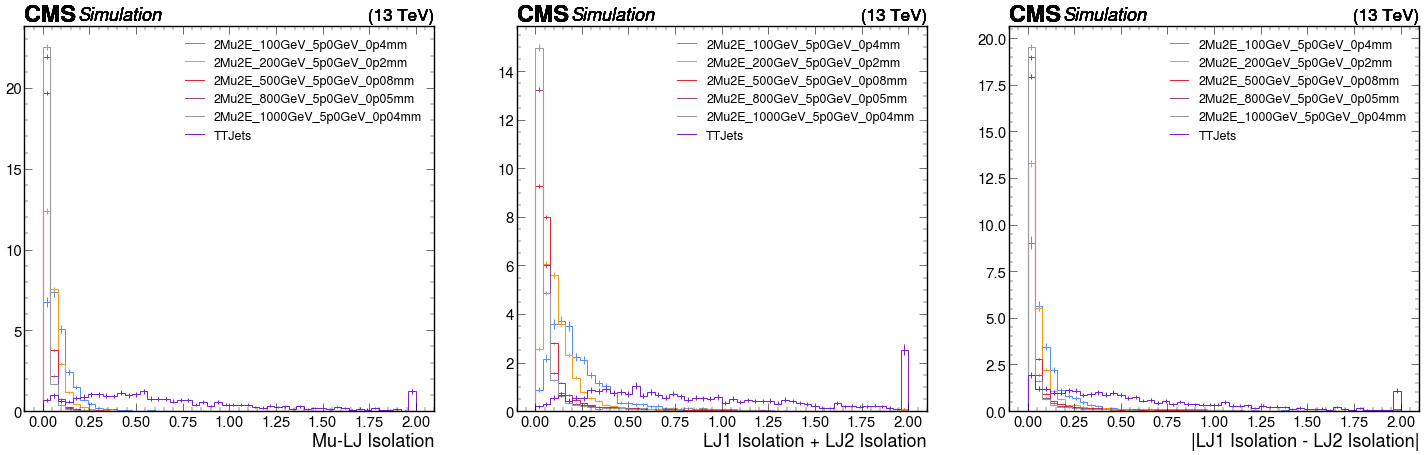

In [7]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["lj_isolation_sum"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["dlj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

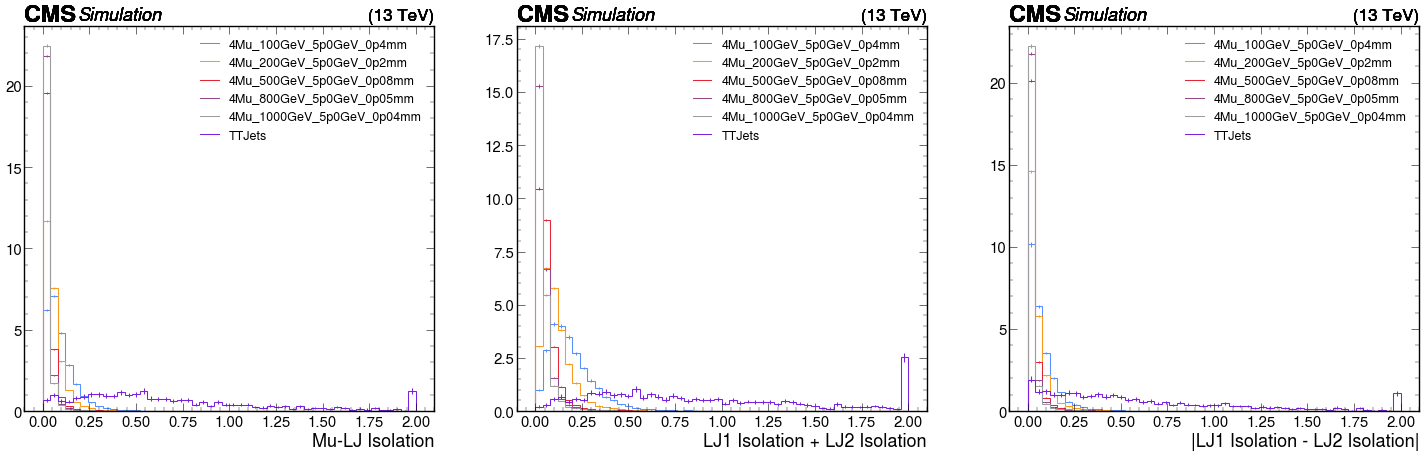

In [9]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(1,3,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_isolation_sum"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(1,3,3)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["dlj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

Text(0.5, 1.0, 'TTJets')

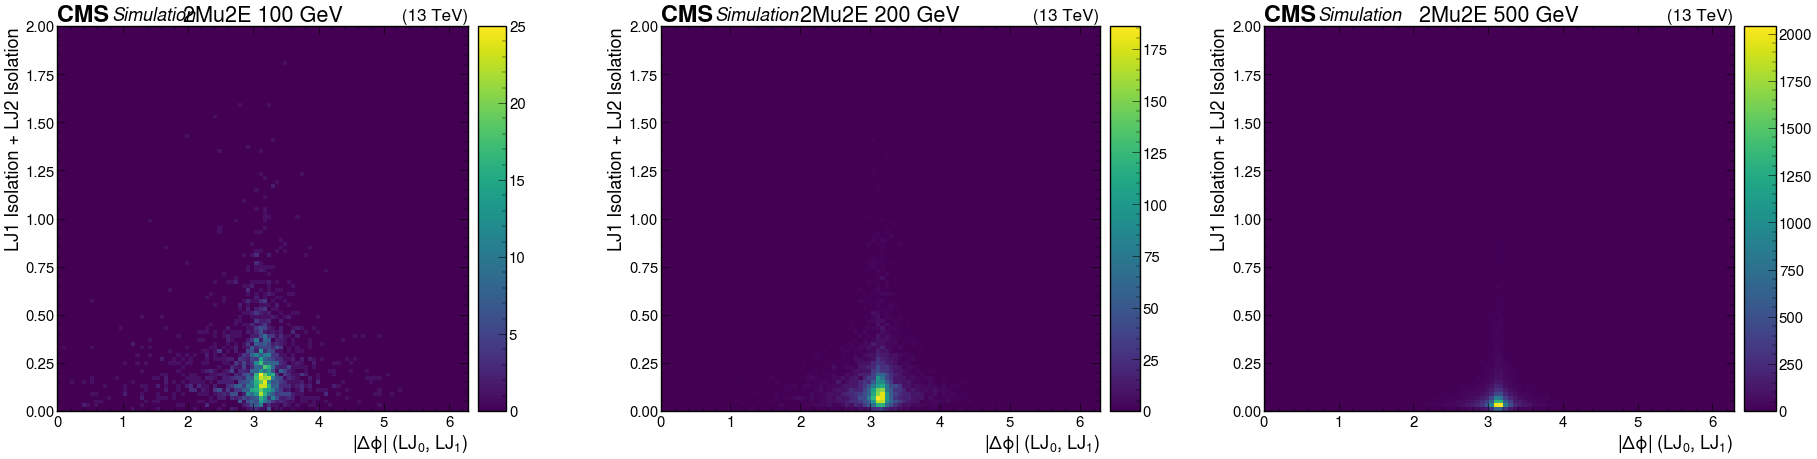

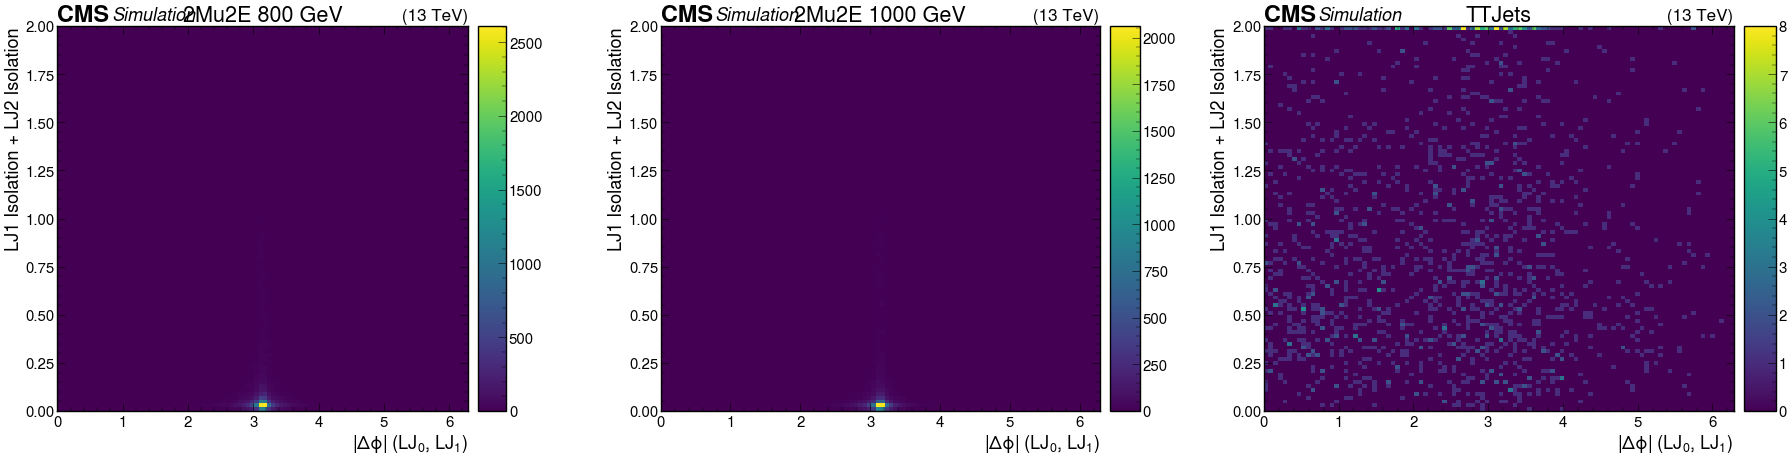

In [10]:
SIG_1_2mu = output["out"][samples_2mu2e[0]]["hists"]
SIG_2_2mu = output["out"][samples_2mu2e[1]]["hists"]
SIG_3_2mu = output["out"][samples_2mu2e[2]]["hists"]
SIG_4_2mu = output["out"][samples_2mu2e[3]]["hists"]
SIG_5_2mu = output["out"][samples_2mu2e[4]]["hists"]
BKG = output["out"][samples_2mu2e[5]]["hists"]

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_1_2mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("2Mu2E 100 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_2_2mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("2Mu2E 200 GeV")

plt.subplot(1,3,3)
utilities.plot(SIG_3_2mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("2Mu2E 500 GeV")

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_4_2mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("2Mu2E 800 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_5_2mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("2Mu2E 1000 GeV")

plt.subplot(1,3,3)
utilities.plot(BKG["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("TTJets")

Text(0.5, 1.0, 'TTJets')

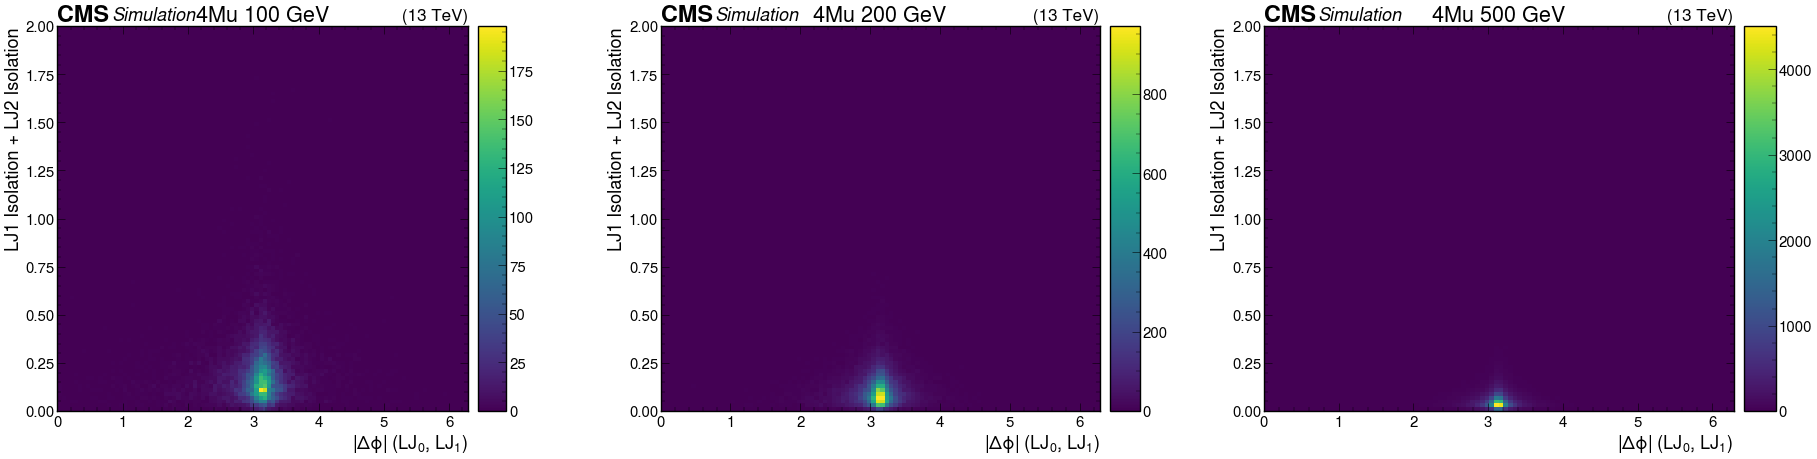

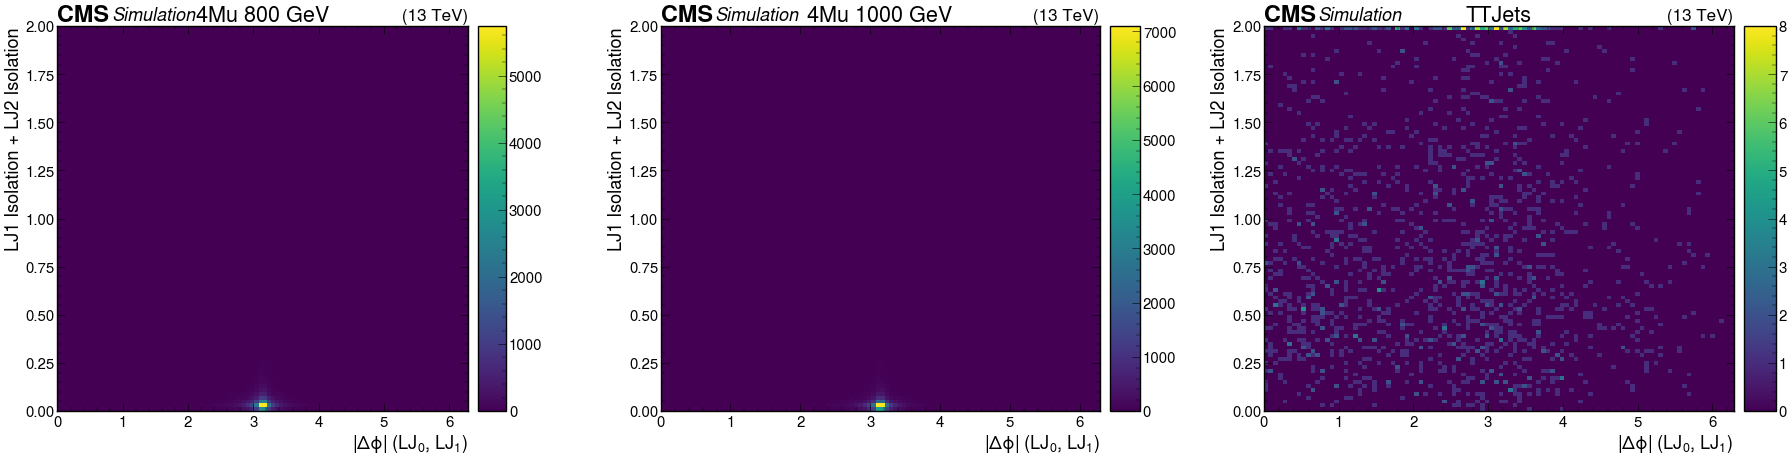

In [12]:
SIG_1_4mu = output["out"][samples_4mu[0]]["hists"]
SIG_2_4mu = output["out"][samples_4mu[1]]["hists"]
SIG_3_4mu = output["out"][samples_4mu[2]]["hists"]
SIG_4_4mu = output["out"][samples_4mu[3]]["hists"]
SIG_5_4mu = output["out"][samples_4mu[4]]["hists"]
BKG = output["out"][samples_4mu[5]]["hists"]

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_1_4mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("4Mu 100 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_2_4mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("4Mu 200 GeV")

plt.subplot(1,3,3)
utilities.plot(SIG_3_4mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("4Mu 500 GeV")

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_4_4mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("4Mu 800 GeV")

plt.subplot(1,3,2)
utilities.plot(SIG_5_4mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("4Mu 1000 GeV")

plt.subplot(1,3,3)
utilities.plot(BKG["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("TTJets")

In [13]:
phi_cut = 2.8
iso_cut = 0.30

x_centers = SIG_1_2mu["lj_lj_absdphi_isosum"].axes[1].centers
y_centers = SIG_1_2mu["lj_lj_absdphi_isosum"].axes[2].centers

x_lo = phi_cut / 2
x_hi = phi_cut + (max(x_centers) - phi_cut) / 2
y_lo = iso_cut / 2
y_hi = iso_cut + (max(y_centers) - iso_cut) / 2

NameError: name 'SIG_1_2mu' is not defined

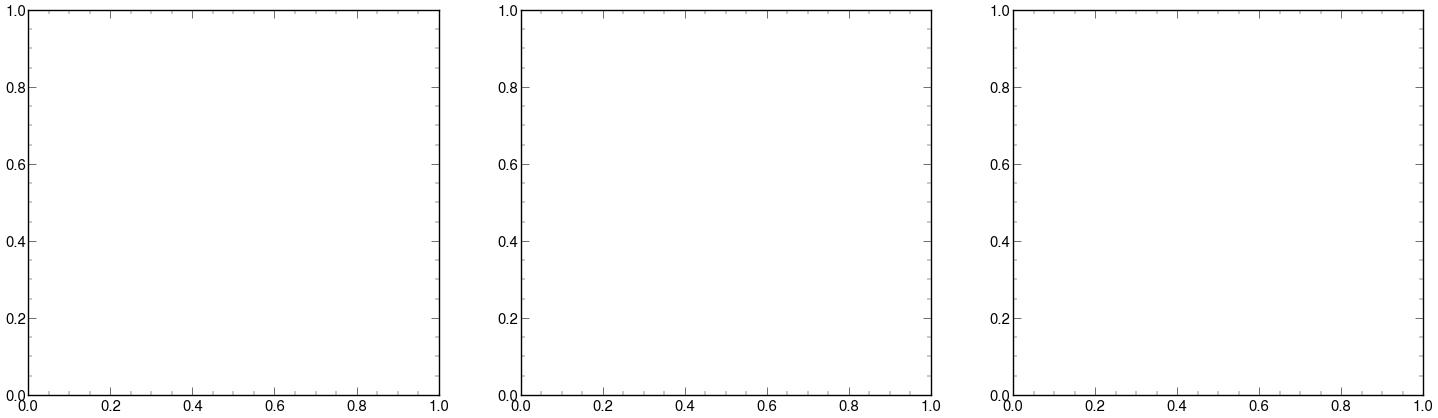

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_1_2mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("2Mu 100 GeV")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

plt.subplot(1,3,2)
utilities.plot(SIG_2_2mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("2Mu 200 GeV")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

plt.subplot(1,3,3)
utilities.plot(SIG_3_2mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("2Mu 500 GeV")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_4_2mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("2Mu 800 GeV")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

plt.subplot(1,3,2)
utilities.plot(SIG_5_2mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("2Mu 1000 GeV")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

plt.subplot(1,3,3)
utilities.plot(BKG["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("TTJets")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

Text(4.525884690321844, 0.15, 'D')

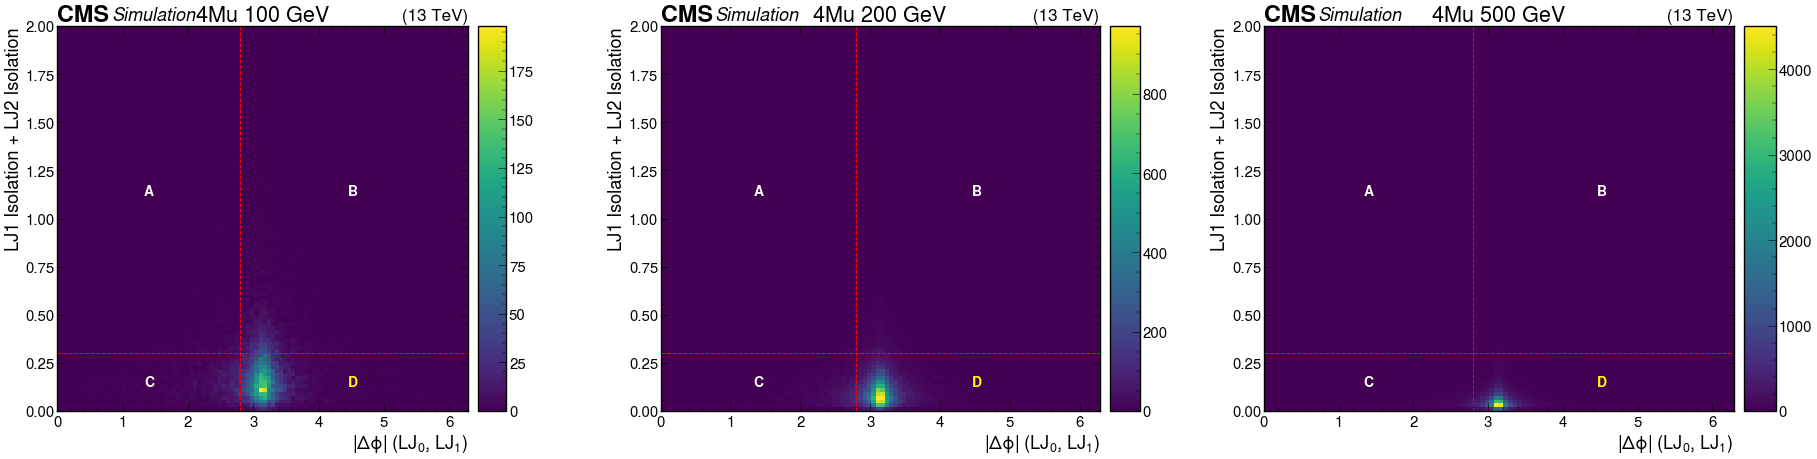

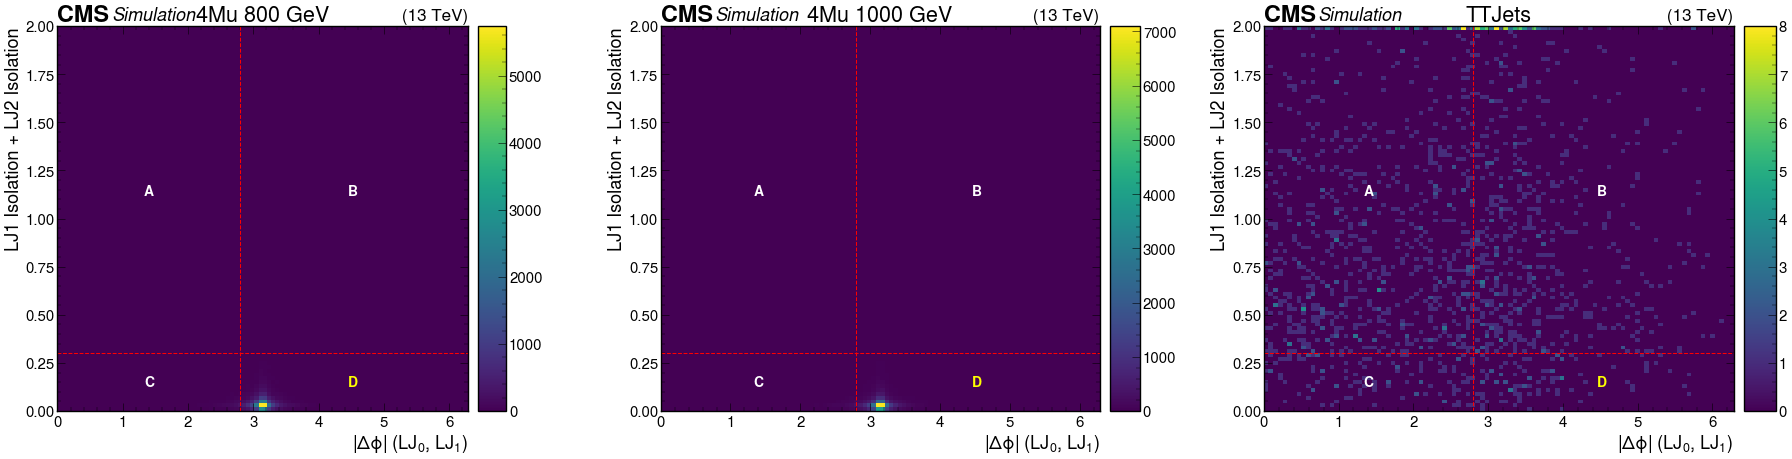

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_1_4mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("4Mu 100 GeV")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

plt.subplot(1,3,2)
utilities.plot(SIG_2_4mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("4Mu 200 GeV")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

plt.subplot(1,3,3)
utilities.plot(SIG_3_4mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("4Mu 500 GeV")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

fig, axs = plt.subplots(1, 3, figsize=(36, 10))
plt.subplot(1,3,1)
utilities.plot(SIG_4_4mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("4Mu 800 GeV")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

plt.subplot(1,3,2)
utilities.plot(SIG_5_4mu["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("4Mu 1000 GeV")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

plt.subplot(1,3,3)
utilities.plot(BKG["lj_lj_absdphi_isosum"][channels[0], :, :])
plt.title("TTJets")
plt.axvline(phi_cut, color='red', linestyle='--')
plt.axhline(iso_cut, color='red', linestyle='--')
plt.text(x_lo, y_hi, "A", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_hi, "B", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_lo, y_lo, "C", fontsize=20, color='white', ha='center', va='center', fontweight='bold')
plt.text(x_hi, y_lo, "D", fontsize=20, color='yellow', ha='center', va='center', fontweight='bold')

In [20]:
fileset = utilities.make_fileset(samples[:5], 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 max_files = 1,
                                )

fileset = utilities.make_fileset(samples[5:10], 
                                 "llpNanoAOD_v2",
                                 location_cfg="signal_4mu_v10.yaml",
                                fileset=fileset,
                                max_files = 1, 
                                #max_files =1, 
                                )

fileset = utilities.make_fileset(samples[10:11], 
                                 "skimmed_llpNanoAOD_v2",
                                 location_cfg="backgrounds.yaml",
                                fileset=fileset,
                                max_files = 1, 
                                #max_files =1, 
                                )

In [21]:
runner = processor.Runner(
    # executor=processor.DaskExecutor(client=client),
    executor=processor.IterativeExecutor(),
    # executor=processor.FuturesExecutor(), 
    schema=NanoAODSchema,
#    maxchunks=10, 
    skipbadfiles=True
)

channels = [
    "base_test",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["isolation_base", "lj_lj_base", "abcd_base", "lj_base", "displacement_base"],
    lj_reco_choices=["0.4"],
    unweighted_hist=True,
)

import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset, treename="Events", processor_instance=p)

out = output["out"]

Output()

Warning: Unable to evaluate dphi low Skipping.

Warning: Unable to apply event cuts to pvs. Skipping.

Warning: Unable to apply event cuts to bs. Skipping.

Warning: Unable to apply event cuts to met. Skipping.

Warning: Unable to apply event cuts to hlt. Skipping.

Warning: Unable to apply event cuts to electrons. Skipping.

Warning: Unable to apply event cuts to photons. Skipping.

Warning: Unable to apply event cuts to muons. Skipping.

Warning: Unable to apply event cuts to dsaMuons. Skipping.

Warning: Unable to apply event cuts to weight. Skipping.

Warning: Unable to apply event cuts to gens. Skipping.

Warning: Unable to apply event cuts to genMus. Skipping.

Warning: Unable to apply event cuts to genEs. Skipping.

Warning: Unable to apply event cuts to genAs. Skipping.

Warning: Unable to apply event cuts to genAs_toMu. Skipping.

Warning: Unable to apply event cuts to genAs_toE. Skipping.

Warning: Unable to apply event cuts to rho_PFIso. Skipping.

Warning: Unable to apply event cuts to jets. Skipping.

Warning: Unable to apply event cuts to ljs. Skipping.

Warning: Unable to apply event cuts to mu_ljs. Skipping.

Warning: Unable to apply event cuts to egm_ljs. Skipping.

Warning: Unable to apply event cuts to pfmu_ljs. Skipping.

Warning: Unable to apply event cuts to dsamu_ljs. Skipping.

Warning: Unable to apply event cuts to electron_ljs. Skipping.

Warning: Unable to apply event cuts to photon_ljs. Skipping.

Exception: Failed processing file: WorkItem(dataset='TTJets', filename='root://xcache//store/group/lpcmetx/SIDM/Backgrounds/2018_v2/Skims/TTJets_TuneCP5/skimmed_output1_0.root', treename='Events', entrystart=0, entrystop=12596, fileuuid=b'\x80\x01\xf2\x8e\xed\xbe\x11\xef\xaa\r\x8d\xfc\xe6\x9b\xbe\xef', usermeta={'skim_factor': 0.2746591272963762})